# BA on Wide ResNet 28 10

# 1. Environment Setup
## 1.0. Check GPU

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## 1.1. Install matplotlib

In [2]:
!pip install matplotlib

## 1.2. Import

In [3]:
import torch, torchvision, augmentation, dataset, train
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

# 2. Data Preprocessing

In [4]:
batch_size = 128
cifar_dir = '../../../../data/OCR/Jason/cifar10/'

M = 6

In [5]:
pre_transform = [transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip()]
post_transform = [augmentation.Cutout(1, 8), 
                  transforms.ToTensor(), transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], std=[0.1950, 0.1922, 0.1940])]

train_transform = transforms.Compose(pre_transform + post_transform)

test_transform = transforms.Compose([transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], std=[0.1950, 0.1922, 0.1940])])

train_dataset = dataset.BA_CIFAR10(M=M, cifar_dir=cifar_dir, train=True, transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=False)

test_dataset = torchvision.datasets.CIFAR10(cifar_dir, train=False, download=False, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=False)

# 3. Train Model

In [6]:
depth = 28
widen_factor = 10
dropout_rate = 0.3
num_classes = 10

BA = True
gpu_id = 4

print_freq = 60
epoch_print = 10

save = False
epochs = 201

lr = 0.1
momentum = 0.9
weight_decay = 0.0005
nesterov = True
milestones = [60, 120, 160]

In [7]:
WRN_28_10 = train.Wide_ResNet(depth, widen_factor, dropout_rate, num_classes, BA, gpu_id, print_freq, epoch_print)
WRN_28_10.train(train_loader, test_loader, save, epochs, lr, momentum, weight_decay, nesterov, milestones)

Epoch 1 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 60 - Train Loss : 1.7693, Test Loss : 2.0898, Train Acc : 31.2500, Test Acc : 25.3500

*********************************** Best Acc Updated ***********************************
Iteration : 120 - Train Loss : 1.6517, Test Loss : 1.9936, Train Acc : 37.5000, Test Acc : 33.4700

*********************************** Best Acc Updated ***********************************
Iteration : 180 - Train Loss : 1.6478, Test Loss : 1.5048, Train Acc : 39.1927, Test Acc : 46.2100
Iteration : 240 - Train Loss : 1.4739, Test Loss : 1.7895, Train Acc : 46.4844, Test Acc : 45.6000

*********************************** Best Acc Updated ***********************************
Iteration : 300 - Train Loss : 1.4287, Test Loss : 1.3663, Train Acc : 48.5677, Test Acc : 52.5300
Iteration : 360 - Train Loss : 1.0959, Test Loss : 1.6079, Train Acc : 58.2031, Test Acc : 50.5500
Epoch 11 Started...

*******

Iteration : 300 - Train Loss : 0.0728, Test Loss : 0.2027, Train Acc : 97.2656, Test Acc : 94.5300
Iteration : 360 - Train Loss : 0.0912, Test Loss : 0.1641, Train Acc : 96.4844, Test Acc : 95.4400
Epoch 111 Started...
Iteration : 60 - Train Loss : 0.0567, Test Loss : 0.1734, Train Acc : 98.1771, Test Acc : 95.2100
Iteration : 120 - Train Loss : 0.0870, Test Loss : 0.1395, Train Acc : 97.5260, Test Acc : 96.1300
Iteration : 180 - Train Loss : 0.0804, Test Loss : 0.1498, Train Acc : 98.0469, Test Acc : 96.0300
Iteration : 240 - Train Loss : 0.0430, Test Loss : 0.1564, Train Acc : 98.9583, Test Acc : 95.9000
Iteration : 300 - Train Loss : 0.0636, Test Loss : 0.1505, Train Acc : 98.4375, Test Acc : 95.8300
Iteration : 360 - Train Loss : 0.0610, Test Loss : 0.1507, Train Acc : 98.0469, Test Acc : 95.7800
Epoch 121 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 60 - Train Loss : 0.0344, Test Loss : 0.1178, Train Acc : 98.6979

Text(0, 0.5, 'Accuracy')

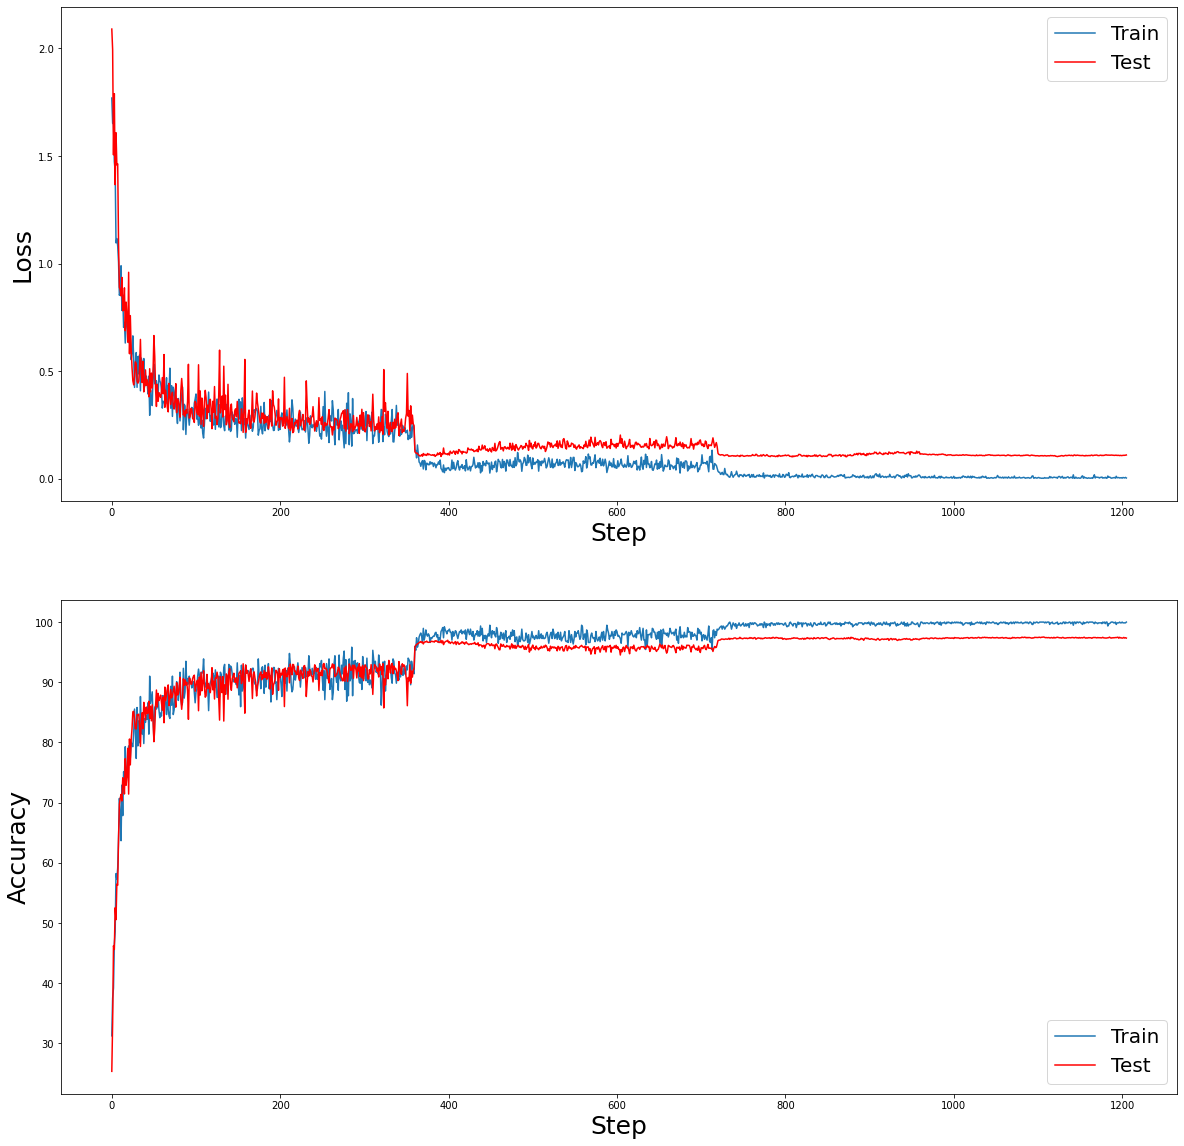

In [8]:
plt.figure(figsize=(20, 20))
plt.rcParams['axes.titlesize'] = 30
plt.axis('off')

label_fontsize = 25

plt.subplot(2, 1, 1)
train_lossline, = plt.plot(WRN_28_10.train_losses, label='Train')
test_lossline, = plt.plot(WRN_28_10.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)

plt.subplot(2, 1, 2)
train_accline, = plt.plot(WRN_28_10.train_acc, label='Train')
test_accline, = plt.plot(WRN_28_10.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)